In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Load dataset
data = pd.read_csv("Mall_Customers.csv")

print("Dataset Head:")
print(data.head())

Dataset Head:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Select Features for Clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

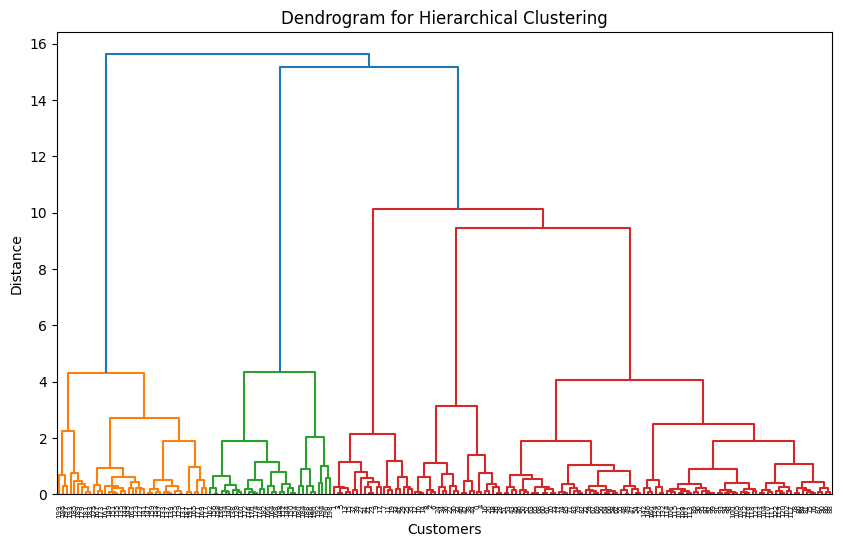

In [6]:
# Create Dendrogram to Choose Number of Clusters
plt.figure(figsize=(10,6))  # The method "ward" groups points that make the smallest increase in variance
Z = linkage(scaled_X, method='ward')  # linkage() builds connections between data points
dendrogram(Z) # Draws the hierarchical tree structure (dendrogram)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [7]:
# Apply Agglomerative Clustering

# From  5 clusters
clusters = fcluster(Z, t=5, criterion ='maxclust')

# Add cluster results to dataFrame
data['Cluster'] = clusters

print(data.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        3  
2        4  
3        3  
4        4  


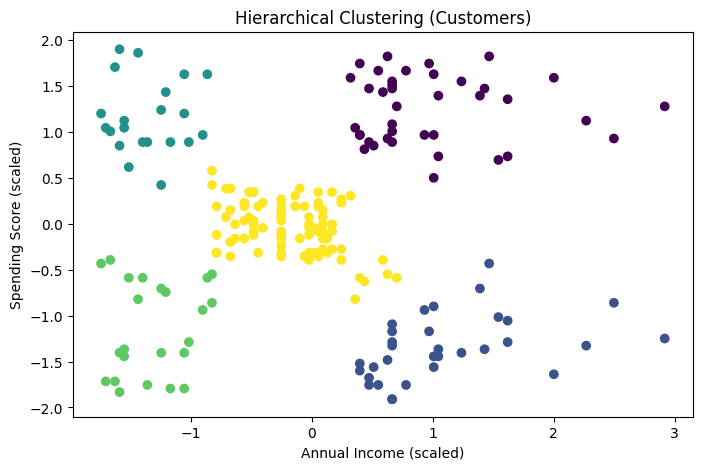

In [8]:
# Visualize Cluster Results
plt.figure(figsize=(8,5))
plt.scatter(scaled_X[:,0], scaled_X[:,1], c=clusters)
plt.title("Hierarchical Clustering (Customers)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()
